# Web Scraping



<img src='https://www.grid.cl/blog/wp-content/uploads/2019/03/001-efficient-web-scraping.png' />

Web scraping es una técnica utilizada mediante programas de software para extraer información de sitios web. Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

El web scraping está muy relacionado con la indexación de la web, la cual indexa la información de la web utilizando un robot y es una técnica universal adoptada por la mayoría de los motores de búsqueda. Sin embargo, el web scraping se enfoca más en la transformación de datos sin estructura en la web (como el formato HTML) en datos estructurados que pueden ser almacenados y analizados en una base de datos central, en una hoja de cálculo o en alguna otra fuente de almacenamiento. 


---


**Para qué sirve** 

Alguno de los usos del web scraping son la comparación de precios en tiendas, la monitorización de datos relacionados con el clima de cierta región, la detección de cambios en sitios webs y la integración de datos en sitios webs.


---

**Consecuencias negativas del web scraping** 😞

Hay que tener en cuenta que, cuando una web se scrapea, se está simulando la visita de un usuario. Si el servicio web recibe demasiadas visitas y no le da tiempo de servir a todas, se puede colapsar. El scrapeo puede ser aislado, pero en los casos en los que se produce de forma recurrente, podemos crear varios problemas a las webs que visitamos:

- Aumenta la dificultad del análisis de los datos reales, ya que hay que habría que identificar y filtrar ese tráfico artificial.
- El muestreo les afectaría en mayor medida, haciendo que el tamaño de la muestra fuera menor y por consiguiente los datos menos precisos.
- Si los bots pueden hacer login en el site, puede afectar a nivel de audiencia, contaminando los datos de ciertos segmentos de usuarios.

Por eso las webs suelen implementar métodos de seguridad para **bloquear la navegación** cuando detectan que se está accediendo de forma automatizada a las mismas, muchas veces ofreciendonos la opción de pagar para obtener acceso a una API o bien una suscripción mensual para poder seguir navegando en el sitio logueado con un nombre de usuario.

---

# Scraping con Python parte 1: Librería Beautiful Soup


Beautiful Soup es una biblioteca/librería de Python para analizar documentos HTML (incluyendo los que tienen un marcado incorrecto). Esta biblioteca crea un árbol con todos los elementos del documento y puede ser utilizado para extraer información.

La versión actual a octubre de 2022 es Beautiful Soup 4 y está disponible para Python 3.6+. La versión para Python 2 dejó de tener soporte en 2021, pero aún puede ser descargada. [Página de descarga de Beautiful Soup](https://https://www.crummy.com/software/BeautifulSoup/#Download) 






Comencemos con un ejemplo, scrapeando data de quotes.toscrape.com, una página específicamente pensada para practicar scraping:

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
print(response)

Como en este caso la página es HTML, vamos a armar el árbol de contenidos con Beautiful Soup.

In [ ]:
soup = BeautifulSoup(response.text,'html')
# soup = BeautifulSoup(response.text,'lxml') #Esto es más general, no necesariamente html
print(soup)



---


Ahora mi objetivo es recuperar todas las citas que están publicadas en ese sitio. Si prestamos atención, se encuentran dentro del tag: `<span class="text" itemprop="text">`.

Además, podríamos querer recuperar los autores. **¿En qué tag se encuentran los mismos?**

**¿Y si quisieramos recuperar los tags o palabras clave?**

In [ ]:
quotes = soup.find_all("span", class_="text") # Atencion el parametro se llama "class_" porque "class" es una palabra reservada de python
authors = soup.find_all("small", class_="author")
tags = soup.find_all("div", class_="tags")
for i in range(0,len(quotes)):
    print(quotes[i].text)
    print(authors[i].text)
    quoteTags = tags[i].find_all('a',class_='tag')
    for quoteTag in quoteTags:
        print(quoteTag.text)
    print("")



---

**Scraping con paginado**

Ahora pasemos a un ejemplo más complejo. Usualmente, los datos de una página web no estarán todos disponibles en la misma página, sino que habrá que navegar moviendose por un índice de páginas.

Ahora vamos a analizar el siguiente sitio: https://scrapingclub.com/exercise/list_basic/ 👀


Nuestro objetivo será recuperar el precio y nombre de cada uno de los artículos publicados en la página.

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://scrapingclub.com/exercise/list_basic/'

count = 1
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
items = soup.find_all('div', class_='col-lg-4 col-md-6 mb-4')
for i in items:
    itemName = i.find('h4', class_='card-title').text.strip('\n')
    itemPrice = i.find('h5').text
    print('%s) Price: %s , Item Name: %s' % (count, itemPrice, itemName))
    count = count + 1

¡Bien, esto funciona para la primer página!

Ahora, queremos comenzar a navegar. **¿Cómo se llama el elemento que nos permitirá navegar? Revisemos nuevamente el sitio web**

Al parecer es un `ul` (unordered list) de clase `"pagination"` y dentro tiene elementos del tipo `a` (links) de clase `"page-link"`. Vamos a recuperar entonces esos elementos con Beautiful Soup.

Procederemos a armar una lista con los links a cada una de las paginas del sitio:

In [ ]:
pagination = soup.find('ul', class_='pagination')
pages = pagination.find_all('a', class_='page-link')
urls = []
for page in pages:
    pageNum = int(page.text) if page.text.isdigit() else None
    if pageNum != None:
        link = page.get('href')
        urls.append(link)

Ahora procederemos a recorrer esta lista y mostrar los elementos restantes (todos desde la página 2 hasta la última página):

In [ ]:
for i in urls:
    response = requests.get(url + i)
    soup = BeautifulSoup(response.text, 'lxml')
    items = soup.find_all('div', class_='col-lg-4 col-md-6 mb-4')
    for i in items:
        itemName = i.find('h4', class_='card-title').text.strip('\n')
        itemPrice = i.find('h5').text
        print('%s) Price: %s , Item Name: %s' % (count, itemPrice, itemName))
        count = count + 1



---

# Scraping con Python parte 2: Librería Selenium

Siendo estrictos, Selenium no es una librería de scraping, sino de navegación automatizada, y su objetivo principal es servirnos para hacer testing de aplicaciones web.

Selenium provee una herramienta de grabar/reproducir para crear pruebas sin usar un lenguaje de scripting para pruebas (Selenium IDE). Incluye también un lenguaje específico de dominio para pruebas (Selenese) para escribir pruebas en un amplio número de lenguajes de programación populares incluyendo Java, C#, Ruby, Groovy, Perl, PHP y Python. 

Estas pruebas pueden ejecutarse entonces usando la mayoría de los navegadores web modernos en diferentes sistemas operativos como Windows, Linux y OSX, para lo cual deberemos instalar un **driver adecuado a la versión de navegador que tengamos instalado**, ya que esta librería tomará control del navegador y hará la navegación de manera automatizada.



Comencemos haciendo una simple automatización haciendo una búsqueda en Google.

Atención: Primero habrá que instalar la librería y también instalar un driver adecuado a la versión de navegador web que queremos usar.

In [ ]:
# 1. Instalación de la librería
!pip install selenium

2. Chequear en Menu > Settings la versión de navegador que tenemos:

Si usamos Chrome por ejemplo podemos entrar directamente a: chrome://settings/help y revisar la versión. Luego descargar de esta web, el driver correspondiente: [Descarga de drivers Chrome](https://chromedriver.chromium.org/downloads)

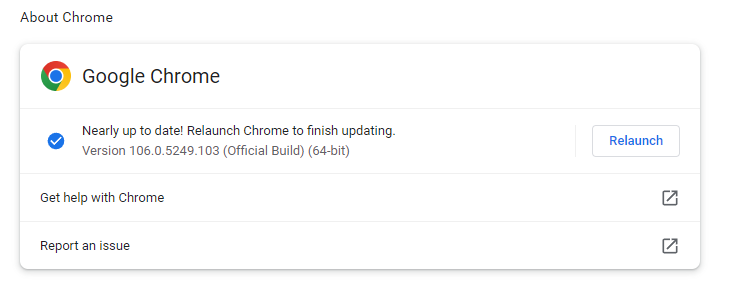



Pasemos a los ejemplos de selenium que están compartidos en el repositorio...